<a href="https://colab.research.google.com/github/Actulus/MI/blob/main/Lab8_Kohonen_SOM_Iris_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn-som

# sklearn-som
Egy egyszerű, síkbeli önszerveződő térkép a Scikit Learn klaszterezési módszereihez hasonló módszerekkel.

A sklearn-som egy Kohonen önszerveződő térkép minimalista, egyszerű implementációja sík (téglalap) topológiával. Az adatok klaszterezésére és dimenziócsökkentés elvégzésére szolgál.

Miért egy másik SOM csomag?
Az Ön által választott gépi tanulási keretrendszerben már van egy maroknyi hasznos SOM csomag. Akkor miért készítene még egyet? Nos, a sklearn-som, ahogy a neve is mutatja, úgy van megírva, hogy olyan interfészre legyen írva, mint egy klaszterezési módszer, amit a Scikit Learn-ben találsz. Előnye, hogy csak egy függőséggel rendelkezik (numpy), és ha már ismeri a Scikit Learn gépi tanulási API-ját, akkor könnyen el tud majd helyezkedni a sklearn-som segítségével.

# Hogyan kell használni
A sklearn-som használata nem is lehetne egyszerűbb. Először is, importáljuk a SOM osztályt a sklearn_som.som modulból:

In [2]:
"""Példa egyszerű SOM használatával a sklearn Iris adathalmazának klaszterezésére.
MEGJEGYZÉS: Ez a példa a sklearn és a matplotlib programokat használja, de egyik sem szükséges a használatához.
A som (a sklearn itt csak az adatokhoz, a matplotlib pedig csak a grafikus ábrázoláshoz van használatban.
A kimenet ábrázolására)."""
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets

from sklearn_som.som import SOM

Most létre kell hoznod egy SOM-példányt az adatok klaszterezéséhez, de előbb szerezzünk néhány adatot. Ehhez a részhez a sklearn Iris Datasetjét fogjuk használni, de a SOM használatához nincs szükségünk sklearnra. Ha más forrásból származó adatokkal rendelkezik, akkor nincs rá szüksége. De mi használni fogjuk, ezért szerezzük meg. Mi is csak az első két jellemzőt fogjuk használni, hogy az eredményeinket könnyebb legyen vizualizálni:

In [3]:
# Load iris data
iris = datasets.load_iris()
iris_data = iris.data
iris_label = iris.target

In [4]:
# Extract just two features (just for ease of visualization)
iris_data = iris_data[:, :2]

Most, mint bármelyik sklearn osztályozó esetében, létre kell hoznunk egy SOM példányt, és meg kell hívnunk a .fit() parancsot az adatainkon, hogy illesszük a SOM-ot. Azt már tudjuk, hogy az Iris adathalmazban 3 osztály van, ezért egy 3x1-es struktúrát fogunk használni az önszerveződő térképünkhöz, de a gyakorlatban lehet, hogy különböző struktúrákat kell kipróbálnunk, hogy megtaláljuk, mi működik a legjobban az adatainkhoz. Építsük fel és illesszük be a som-ot:

In [11]:
# Build a 3x1 SOM (3 clusters)
# som = SOM(m=3, n=1, dim=2, random_state=1234)

som = SOM(m=5, n=5, dim=2, random_state=5678)

Megjegyezzük, hogy a SOM példányának létrehozásakor megadjuk az m és n értékeket, hogy az önszerveződő térkép neuronjainak m x n mátrixát kapjuk.

Most ugyanúgy, mint a sklearnban, rendeljünk minden adatpontot egy előre jelzett klaszterhez a .predict() metódus segítségével:

In [12]:
# Fit it to the data
som.fit(iris_data)

In [13]:
# Assign each datapoint to its predicted cluster
predictions = som.predict(iris_data)

És nézzük meg, hogyan sikerült:

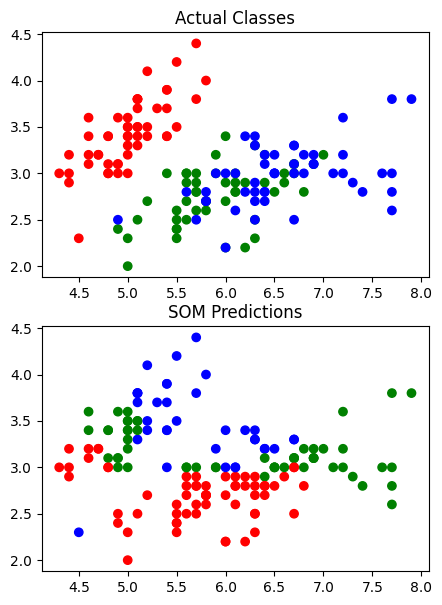

In [14]:
# Plot the results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,7))
x = iris_data[:,0]
y = iris_data[:,1]
colors = ['red', 'green', 'blue']

ax[0].scatter(x, y, c=iris_label, cmap=ListedColormap(colors))
ax[0].title.set_text('Actual Classes')

ax[1].scatter(x, y, c=predictions, cmap=ListedColormap(colors))
ax[1].title.set_text('SOM Predictions')
plt.savefig('iris_example.png')

# Megoldandó feladatok:
Tanulmányozd a kódot, és határozd meg, hogy melyek azok a paraméterek amiket meg tudsz változtani? Miket segítenek? A válaszokat és a kisérleteket írd le a Notebookba :D

A változtatható paraméterek:
* m - a létrehozandó mátrix oszlopainak számát határozza meg
* n - a létrehozandó mátrix sorainak számát határozza meg
* dim - hány feature lesz az inputban
* random_state - opcionális, a súlyozáshoz szükséges, új numpy random generatort hoz létre
* sigma - minden súly egyenkénti magnitudójának meghatározására szolgál, a nagyobb értékek aggresszívabb változásokat vonnak maguk után
* lr - a súlyok frissítésének az alap lépésmérete
* max_iter - opcionális, ennyi iteráció után megáll a trainelés

Az m és n értékének növelésével nagyobb mátrixok kapunk, ami részletesebb bemutatást eredményez, de nem feltétlenül vezet jobb eredményekhez. A dim változtatásával komplexebb adatokat is fel tudunk dolgozni. A random_state változtatásával másabban konvergál a trainelés.